## Module imports

### Colab

In [ ]:
from google.colab import files

### Local

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import time

import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam

from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.regularizers import l2

from sklearn.metrics import accuracy_score

### Utility

In [2]:
from utility.utility import *

## Data ingestion

In [3]:
data_preprocessed_path = "e:\\LFS\\Projects\\DS_AI_ML_DL\\ML\\DL Experimentation Pipeline\\data\\processed"
notebook_dir_path = "e:\\LFS\\Projects\\DS_AI_ML_DL\\ML\\DL Experimentation Pipeline\\notebooks"

preprocess_iter = 1
current_iter_data_dir = f"data_{preprocess_iter}"

current_iter_data_dir_path = os.path.join(data_preprocessed_path, current_iter_data_dir)

In [4]:
current_iter_data_dir_path

'e:\\LFS\\Projects\\DS_AI_ML_DL\\ML\\DL Experimentation Pipeline\\data\\processed\\data_1'

In [5]:
import_x_train_transformed_path = os.path.join(current_iter_data_dir_path, "X_train_transformed.npy")
import_y_train_path = os.path.join(current_iter_data_dir_path, "y_train.npy")

import_x_test_transformed_path = os.path.join(current_iter_data_dir_path, "X_test_transformed.npy")
import_y_test_path = os.path.join(current_iter_data_dir_path, "y_test.npy")

In [6]:
# Load training data
X_train_transformed = np.load(import_x_train_transformed_path)
y_train = np.load(import_y_train_path)

In [7]:
# Load test data
X_test_transformed = np.load(import_x_test_transformed_path)
y_test = np.load(import_y_test_path)

## Data Overview

In [8]:
X_train_transformed[:2]

array([[1.        , 1.        , 0.        , 0.948     , 0.41891892,
        0.55888604, 0.33940136, 8.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 1.        , 0.652     , 0.62162162,
        0.4906058 , 0.45573302, 4.        , 1.        , 1.        ,
        1.        ]])

In [9]:
y_train[:2]

array([0, 0], dtype=int64)

In [10]:
X_test_transformed[:2]

array([[0.        , 1.        , 0.        , 1.        , 0.35135135,
        0.53948   , 0.8555048 , 5.        , 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , 0.778     , 0.2972973 ,
        0.        , 0.83517441, 8.        , 1.        , 1.        ,
        0.        ]])

In [11]:
y_test[:2]

array([0, 0], dtype=int64)

## Model training

In [12]:
# list to store the name of the models to download
folders_to_download = []

### Parameter configurations

In [13]:
# This should be the current directory when working on google colab
# CURRENT_DIR = "/content"

# Local work environment
CURRENT_DIR = 'e:\\LFS\\Projects\\DS_AI_ML_DL\\ML\\DL Experimentation Pipeline\\notebooks'

In [55]:
MODEL_DIR = 'e:\\LFS\\Projects\\DS_AI_ML_DL\\ML\\DL Experimentation Pipeline\\models'
FIGURE_DIR = 'e:\\LFS\\Projects\\DS_AI_ML_DL\\ML\\DL Experimentation Pipeline\\reports\\figures'

In [15]:
model_number = "1.0"
new_dir = f"Model {model_number}"
print(new_dir)

Model 1.0


In [16]:
# model architecture params

nodes_activations = {
    "layer" : [
        (16,"relu"),
        (16,"relu"),
        (16,"relu"),
        (1,"sigmoid"),
    ]
}

# model compilation params
loss = 'binary_crossentropy'
metrics = ['accuracy']

# model fitting params
batch_size = 32
epochs = 100
validation_split = 0.2

In [17]:
# Current model update details
update_details = """
- Initial run
"""

#### Custom training time callback configuration

In [18]:
class TrainingTimeCallback(Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        self.end_time = time.time()
        self.total_training_time = self.end_time - self.start_time
        print(f"Total training time: {self.total_training_time} seconds")

In [19]:
# Instantiate the callback
training_time_callback = TrainingTimeCallback()

In [20]:
total_training_time = -1

#### Early stopping configuration

In [21]:
early_stopping_params = None

# Defining EarlyStopping parameters
# early_stopping_params = {
#     "monitor" : "val_loss",
#     "patience" : 10,
#     "verbose" : 1
# }

# Defining EarlyStopping callback
if early_stopping_params is None:
  early_stopping = None
else:
  early_stopping = EarlyStopping(**early_stopping_params)
  
print(early_stopping_params)

None


#### Optimizer configuration

In [22]:
# Defining optimizer parameters

# optimizer_name = 'RMSprop'
optimizer_name = 'Adam'

optimizer_params = {
  "learning_rate" : 0.001
}

# Defining optimizer
if optimizer_name == 'RMSprop':
  optimizer = RMSprop(**optimizer_params)

  optimizer_params["optimizer"] = optimizer_name

elif optimizer_name == 'Adam':
  optimizer = Adam(**optimizer_params)

  optimizer_params["optimizer"] = optimizer_name
else:
  raise ValueError("Set a proper optimizer before proceeding...")

print(optimizer_params)

{'learning_rate': 0.001, 'optimizer': 'Adam'}


#### Final configuration dictionary

In [23]:
# Model configuration profile in a single dictionary
model_config_profile = {
  "model_number" :  model_number,
  "nodes_activations" :  nodes_activations,
  "optimizer" : optimizer_params,
  "loss" : loss,
  "metrics" : metrics,
  "batch_size" : batch_size,
  "epochs" : epochs,
  "validation_split" : validation_split,
  "early_stopping_params" : early_stopping_params,
  "total training time" : total_training_time,
  "update details" : update_details
  }

model_config_profile

{'model_number': '1.0',
 'nodes_activations': {'layer': [(16, 'relu'),
   (16, 'relu'),
   (16, 'relu'),
   (1, 'sigmoid')]},
 'optimizer': {'learning_rate': 0.001, 'optimizer': 'Adam'},
 'loss': 'binary_crossentropy',
 'metrics': ['accuracy'],
 'batch_size': 32,
 'epochs': 100,
 'validation_split': 0.2,
 'early_stopping_params': None,
 'total training time': -1,
 'update details': '\n- Initial run\n'}

### Architecture | Compilation | Training

In [24]:
model = Sequential()
layer = 0

for nodes, activation in nodes_activations["layer"]:
    if layer == 0:
        model.add(Dense(nodes, activation=activation, input_dim=11))
    else:
        model.add(Dense(nodes, activation=activation))
    
    layer += 1

print(layer)


4


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 753 (2.94 KB)
Trainable params: 753 (2.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [27]:
if early_stopping is None:
  history = model.fit(X_train_transformed,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=validation_split,
                    callbacks = [training_time_callback]
                    )
else:
  history = model.fit(X_train_transformed,
                      y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_split=validation_split,
                      callbacks=[training_time_callback, early_stopping])

Epoch 1/100


200/200 [==============================] - 3s 5ms/step - loss: 0.5077 - accuracy: 0.7948 - val_loss: 0.4736 - val_accuracy: 0.8112
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4793 - accuracy: 0.7964 - val_loss: 0.4564 - val_accuracy: 0.8150
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4606 - accuracy: 0.8014 - val_loss: 0.4400 - val_accuracy: 0.8131
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4495 - accuracy: 0.8078 - val_loss: 0.4302 - val_accuracy: 0.8138
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4392 - accuracy: 0.8103 - val_loss: 0.4229 - val_accuracy: 0.8156
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.8152 - val_loss: 0.4190 - val_accuracy: 0.8263
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4260 - accuracy: 0.8188 - val_loss: 0.4240 - val_accuracy: 0.81

In [28]:
total_training_time = 96.0102

model_config_profile = {
  "model_number" :  model_number,
  "nodes_activations" :  nodes_activations,
  "optimizer" : optimizer_params,
  "loss" : loss,
  "metrics" : metrics,
  "batch_size" : batch_size,
  "epochs" : epochs,
  "validation_split" : validation_split,
  "early_stopping_params" : early_stopping_params,
  "total training time" : total_training_time,
  "update details" : update_details
  }

model_config_profile

{'model_number': '1.0',
 'nodes_activations': {'layer': [(16, 'relu'),
   (16, 'relu'),
   (16, 'relu'),
   (1, 'sigmoid')]},
 'optimizer': {'learning_rate': 0.001, 'optimizer': 'Adam'},
 'loss': 'binary_crossentropy',
 'metrics': ['accuracy'],
 'batch_size': 32,
 'epochs': 100,
 'validation_split': 0.2,
 'early_stopping_params': None,
 'total training time': 96.0102,
 'update details': '\n- Initial run\n'}

### Performance analysis | Export performance plot

In [29]:
# Creating the directory if we want to save the details of the model

def create_directory(CURRENT_DIR, new_dir):
    if (os.getcwd() == CURRENT_DIR):
        if folder_exists(CURRENT_DIR, new_dir):
            raise ValueError(f"\nThe folder named `{new_dir}` already exist...\nThis process will be stopped immediately to avoid any overriding of the data...")
        else:
            os.makedirs(new_dir)
            print(f"New folder named `{new_dir}` created successfully...")
    else:
        raise ValueError("Wrong value of CURRENT_DIR")

In [31]:
create_directory(CURRENT_DIR, new_dir)

New folder named `Model 1.0` created successfully...


In [32]:
# True means - Model performance analysis plots will be exported
save_plot = True
file_path = f"model_{model_number}_performance.png"

You are back to Home directory...


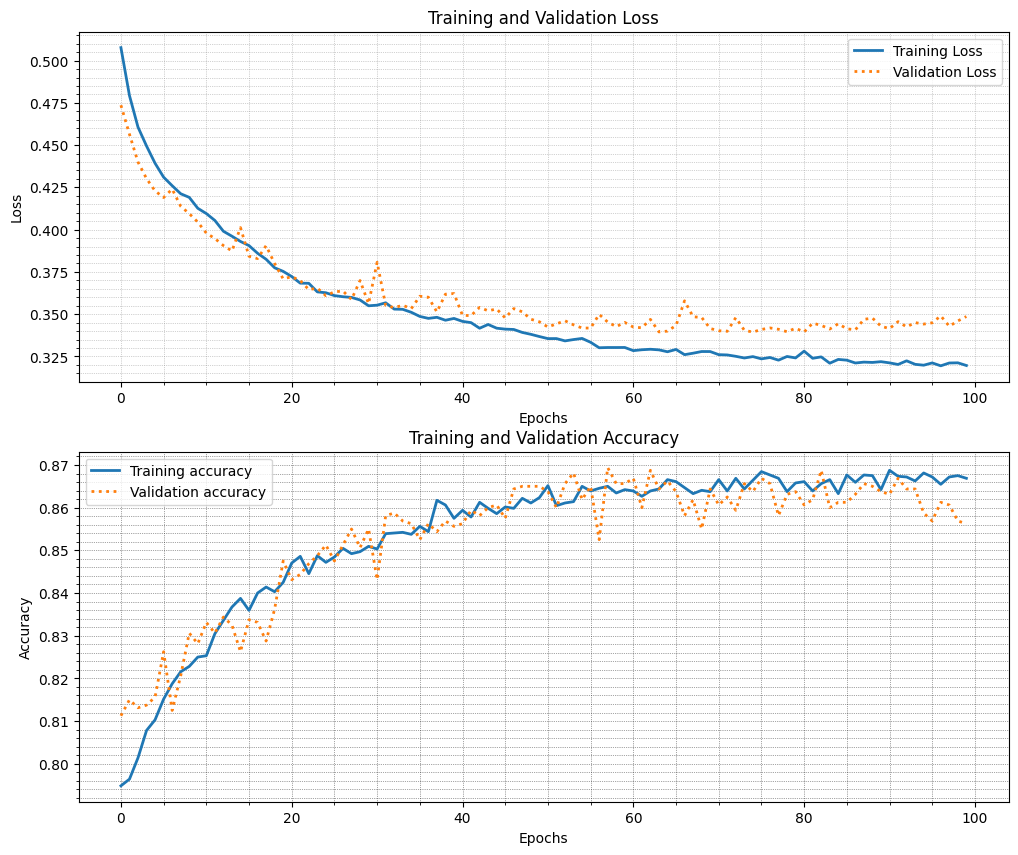

In [38]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle=':', linewidth=2)

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(which='both', linestyle=':', linewidth='0.5', color='gray', alpha=0.7)
plt.minorticks_on()

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], label='Training accuracy', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation accuracy', linestyle=':', linewidth=2)

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(which='both', linestyle=':', linewidth='0.5', color='black', alpha=0.7)
plt.minorticks_on()

if (save_plot):
  if (os.getcwd() == CURRENT_DIR):
    os.chdir(new_dir)
    plt.savefig(file_path)
    os.chdir("..")
  else:
    print("Current directory not matching...")
    print("Performance analysis plots won't be exported")
    print(f"Present working directory: {os.getcwd()}")
else:
  plt.show()

if (os.getcwd() == CURRENT_DIR):
  print("You are back to Home directory...")
else:
  print("WARNING!!!")
  print("You are not in your home directory")
  print(f"Present working directory: {os.getcwd()}")

### Export model and experiment details


In [39]:
export_arch_params(CURRENT_DIR, new_dir, model_number, model, is_export=True, is_import=False)

You are back to Home directory...


In [40]:
history_data = history.history
export_history_json(CURRENT_DIR, new_dir, model_number, history_data)

You are back to Home directory...


In [42]:
model_config_profile_data = model_config_profile
export_model_config(CURRENT_DIR, new_dir, model_number, model_config_profile_data)

You are back to Home directory...


In [41]:
export_model_summary(CURRENT_DIR, new_dir, model_number, model)

You are back to Home directory...


In [394]:
# Export the update details separately

# model_update_details = f"""
# ========================================
# Model {model_number} Update Details
# ========================================
# {update_details}
# ----------------------------------------

# """
# export_model_update_details(CURRENT_DIR, new_dir, model_number, model_update_details)

You are back to Home directory...


In [43]:
# appending the model names in the download list to download all them at once
folders_to_download.append(new_dir)

In [396]:
# Stop execution point
10/0

ZeroDivisionError: division by zero

## Zip and Download exported data - Local | Zip and Download exported data - Colab

In [45]:
print(folders_to_download)

['Model 1.0']


In [46]:
for folder_name in folders_to_download:
  zip_file_name = f"{folder_name}"
  zip_n_download(CURRENT_DIR, folder_name, zip_file_name)

In [35]:
# Stop execution point
10/0

ZeroDivisionError: division by zero